# Generic Backend
Generate simulated distributed backend with no noise from the coupling map

In [1]:
# Import function to build coupling map from file
from lib.distributed_coupling_map import (
    build_coupling_list_ring,
    build_coupling_list_full,
    build_coupling_list_line,
    build_coupling_list_grid,
    build_coupling_list_t_horizontal,
    build_coupling_list_t_vertical,
)

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_circuit_layout, plot_coupling_map, plot_histogram

In [55]:
def calculate_physical_neighbors(coupling_map: CouplingMap):
        return {
            qubit: list(iter(coupling_map.neighbors(qubit)))
            for qubit in coupling_map.physical_qubits
        }

def calculate_physical_connectivity(
         coupling_map: CouplingMap
    ):  # the total number of edges per node in coupling map
        return {
            qubit: len(list(coupling_map.neighbors(qubit)))
            for qubit in coupling_map.physical_qubits
        }

neighbors: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 3, 14: 3, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2}


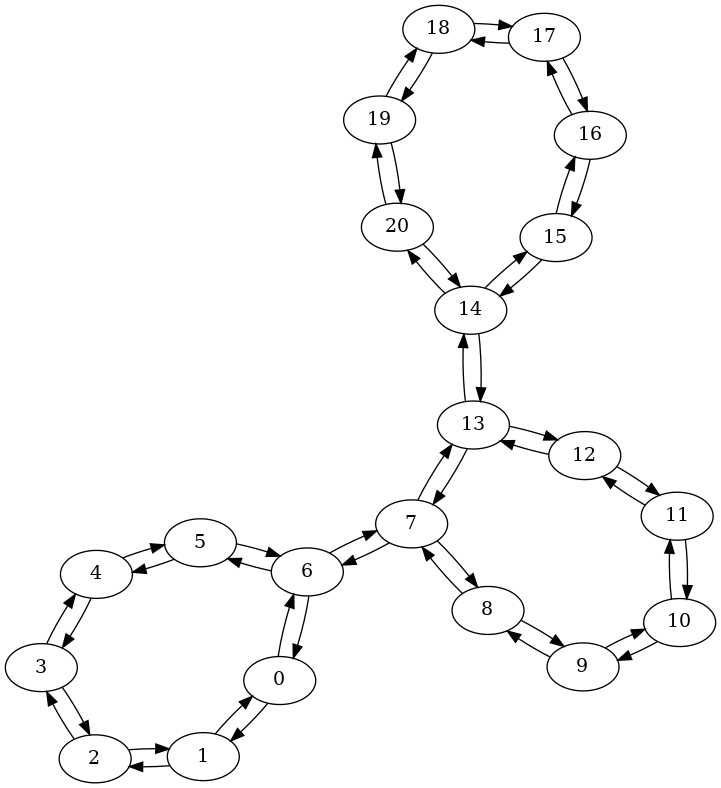

In [59]:
# coupling map structure ring
num_qubits = 7
num_group = 3

coupling_list_ring = build_coupling_list_ring(num_qubits, num_group)
cm_ring = CouplingMap(couplinglist=coupling_list_ring)
print("neighbors:", calculate_physical_connectivity(cm_ring))
display(cm_ring.draw()) # for graphviz

# Example

Build `GenericBackendV2` with provided coupling map

In [35]:
gen_backend = GenericBackendV2(num_qubits=num_qubits * num_group, coupling_map=coupling_list_ring)

Run a quantum circuit with GHZ state on 3 virtual qubits

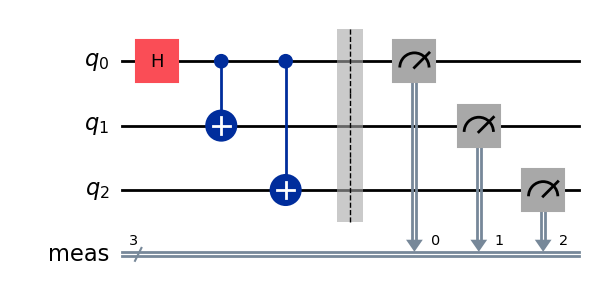

In [23]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()
display(qc.draw('mpl'))

Plot virtual on physical qubits:


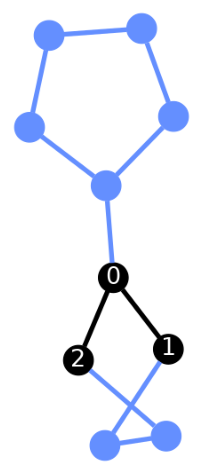

Plot used physical qubits:


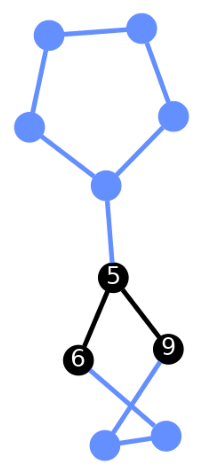

In [36]:
gen_backend = GenericBackendV2(num_qubits=num_qubits * num_group, coupling_map=coupling_list_ring)
transpiled_qc = transpile(qc, gen_backend)
print("Plot virtual on physical qubits:")
display(plot_circuit_layout(transpiled_qc, gen_backend, view='virtual'))
print("Plot used physical qubits:")
display(plot_circuit_layout(transpiled_qc, gen_backend, view='physical'))

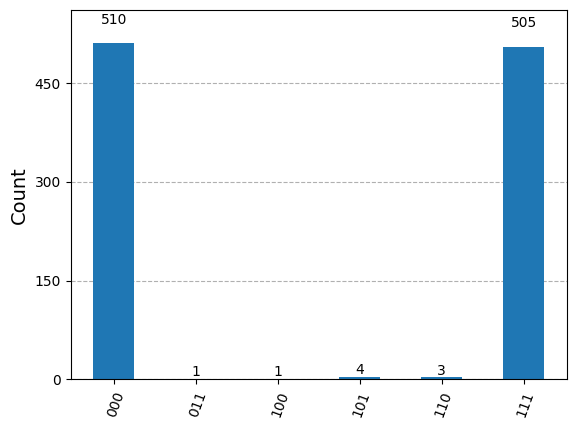

In [37]:
job = gen_backend.run(transpiled_qc)
counts = job.result().get_counts()
display(plot_histogram(counts))

neighbors: {0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 10, 10: 10, 11: 9, 12: 9, 13: 9, 14: 9, 15: 9, 16: 9, 17: 9, 18: 9, 19: 9}


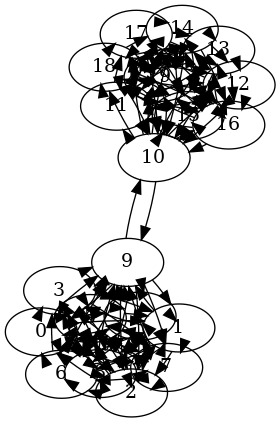

In [58]:
coupling_list_full = build_coupling_list_full(num_qubits=10, num_group=2)
cm_full = CouplingMap(couplinglist=coupling_list_full)
print("neighbors:", calculate_physical_connectivity(cm_full))
display(cm_full.draw()) #graphviz dependency

# qc_full = QuantumCircuit(num_qubits*num_group)
# backend_full = GenericBackendV2(num_qubits=num_qubits*num_group, coupling_map=cm_full)
# transpile_full = transpile(qc_full, backend_full)
# display(plot_circuit_layout(transpile_full, backend_full))

If graphviz dependency is not installed, follow cell above to create `GenericBackendV2` and transpile the quantum circuit

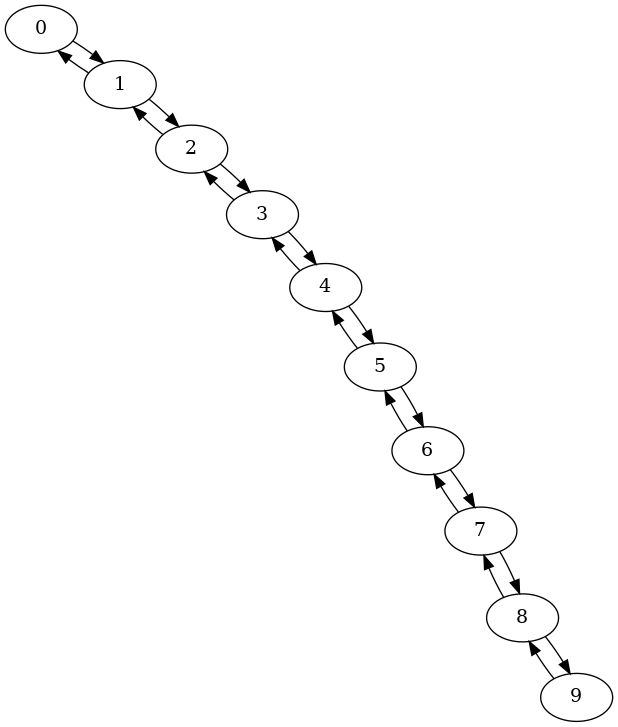

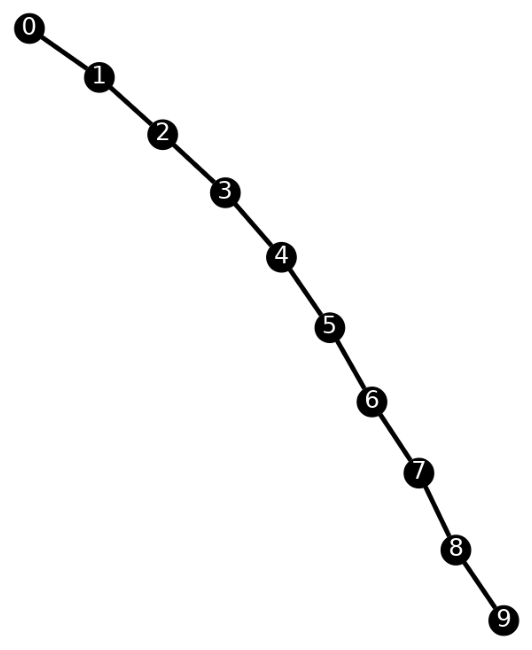

In [39]:
couplinglist = build_coupling_list_line(num_qubits, num_group)
cm = CouplingMap(couplinglist=couplinglist)
display(cm.draw())

qc = QuantumCircuit(num_qubits*num_group)
backend = GenericBackendV2(num_qubits=num_qubits*num_group, coupling_map=cm)
transpiledqc = transpile(qc, backend)
display(plot_circuit_layout(transpiledqc, backend))

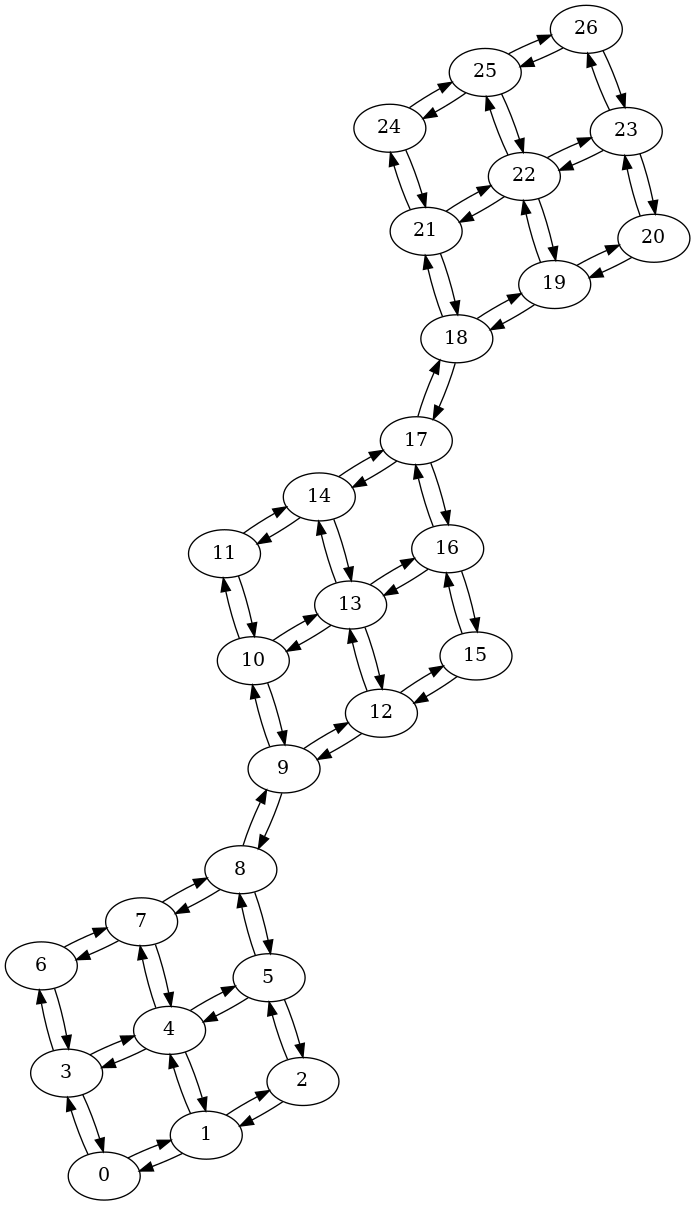

In [49]:
num_rows = 3
num_columns = 3
num_group = 3
coupling_list_grid = build_coupling_list_grid(num_rows, num_columns, num_group)
cm_grid = CouplingMap(couplinglist=coupling_list_grid)
display(cm_grid.draw())

'T' coupling map representation taken from [`FakeLondonV2`](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeLondonV2)  
$0 ↔ 1 ↔ 2$  
$\ \ \ \ \ \ \ \ ↕  $  
$\ \ \ \ \ \ \ \ 3  $  
$\ \ \ \ \ \ \ \ ↕  $  
$\ \ \ \ \ \ \ \ 4  $  

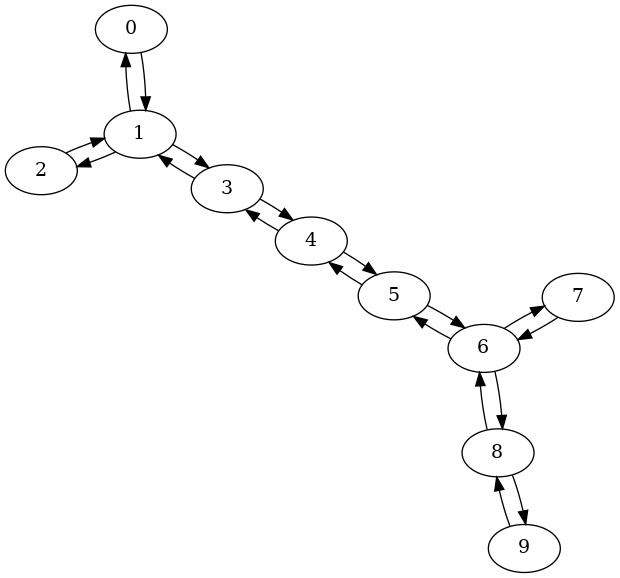

In [41]:
# connect from the end of logical qubit q4
coupling_list_t_horizontal = build_coupling_list_t_horizontal(num_group) 
cm_t_horizontal = CouplingMap(couplinglist=coupling_list_t_horizontal)
display(cm_t_horizontal.draw())

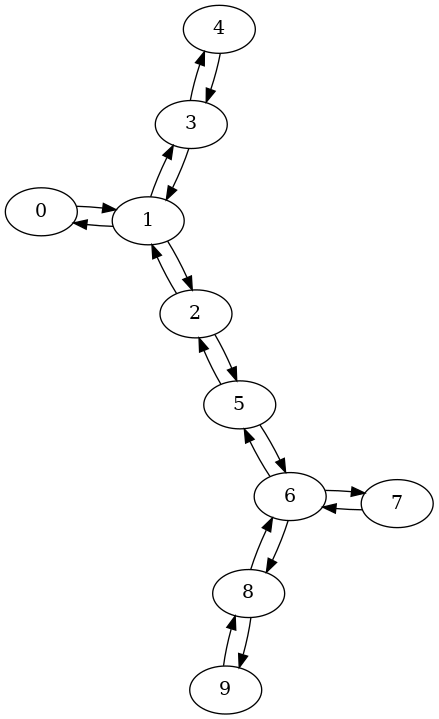

In [42]:
# connect from logical qubit q2
coupling_list_t_vertical = build_coupling_list_t_vertical(num_group)
cm_t_vertical = CouplingMap(couplinglist=coupling_list_t_vertical)
display(cm_t_vertical.draw())